In [2]:
library(AnnotationDbi)

source("../tools/formating/formating.R")

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCums

In [3]:
sce <- LoadSCE('/ps/ai-ready/data/tung')
try(if(is.null(sce)) stop("The file format is not supported."))
print("SingleCellExperiment object is loaded successfully.")
altExp(sce,"ERCC") <- sce[grep("^ERCC-",rownames(sce)), ]
sce <- sce[grep("^ERCC-",rownames(sce),invert = T), ]
sce

[1] "Inside LoadSeurat 3"


Warning message in file(con, "rb"):
“'raw = FALSE' but '/ps/ai-ready/data/tung' is not a regular file”
Warning message in file(con, "rb"):
“cannot open file '/ps/ai-ready/data/tung': it is a directory”


[1] "SingleCellExperiment object is loaded successfully."


class: SingleCellExperiment 
dim: 18938 864 
metadata(0):
assays(1): counts
rownames(18938): ENSG00000237683 ENSG00000187634 ... ENSG00000183753
  ENSG00000172352
rowData names(0):
colnames(864): NA19098.r1.A01 NA19098.r1.A02 ... NA19239.r3.H11
  NA19239.r3.H12
colData names(5): individual replicate well batch sample_id
reducedDimNames(0):
mainExpName: NULL
altExpNames(1): ERCC

In [3]:
species="human"
if(species == "mouse") {
  library(EnsDb.Mmusculus.v79) 
  ENSDB <- "EnsDb.Mmusculus.v79"
  library(org.Mm.eg.db)  #library(org.Hs.eg.db) if human
  EGDB <- "org.Mm.eg.db"
} else if(species == "human") {
  library(EnsDb.Hsapiens.v86)
  ENSDB <- "EnsDb.Hsapiens.v86"
  library(org.Hs.eg.db)
  EGDB <- "org.Hs.eg.db"
} else {
  stop('You must set SPECIES to either "mouse" or "human" at the start of this code block!')
}

Loading required package: ensembldb

Loading required package: GenomicFeatures

Loading required package: AnnotationFilter


Attaching package: 'ensembldb'


The following object is masked from 'package:stats':

    filter






In [4]:
gene_names <- mapIds(get(EGDB), keys=rownames(sce), keytype="ENSEMBL", columns="SYMBOL", column="SYMBOL")

'select()' returned 1:many mapping between keys and columns



In [5]:
sce

class: SingleCellExperiment 
dim: 18938 864 
metadata(0):
assays(1): counts
rownames(18938): ENSG00000237683 ENSG00000187634 ... ENSG00000183753
  ENSG00000172352
rowData names(0):
colnames(864): NA19098.r1.A01 NA19098.r1.A02 ... NA19239.r3.H11
  NA19239.r3.H12
colData names(5): individual replicate well batch sample_id
reducedDimNames(0):
mainExpName: NULL
altExpNames(1): ERCC

In [6]:
rowData(sce)$SYMBOL <- gene_names
table(is.na(gene_names))

print("Remove all genes for which no symbols were found.")
sce <- sce[! is.na(rowData(sce)$SYMBOL),] # Remove all genes for which no symbols were found

print("Check if we can find mitochondrial proteins in the newly annotated symbols.")
grep("^MT-", rowData(sce)$SYMBOL, value=T) # Check if we can find mitochondrial proteins in the newly annotated symbols
grep("^RP[LS]", rowData(sce)$SYMBOL, value=T)
grep("ATP8", rowData(sce)$SYMBOL, value=T) # Quick search for mitochondrial protein ATP8, which is also called MT-ATP8

ensdb_genes <- genes(get(ENSDB))
MT_names <- ensdb_genes[seqnames(ensdb_genes) == "MT"]$gene_id
is_mito <- rownames(sce) %in% MT_names
table(is_mito)


FALSE  TRUE 
18078   860 

[1] "Remove all genes for which no symbols were found."
[1] "Check if we can find mitochondrial proteins in the newly annotated symbols."


named character(0)

ENSG00000116251 ENSG00000142676 ENSG00000117676 ENSG00000142937 ENSG00000122406 
        "RPL22"         "RPL11"       "RPS6KA1"          "RPS8"          "RPL5" 
ENSG00000177954 ENSG00000136643 ENSG00000138326 ENSG00000177600 ENSG00000166441 
        "RPS27"       "RPS6KC1"         "RPS24"         "RPLP2"        "RPL27A" 
ENSG00000110700 ENSG00000162302 ENSG00000175634 ENSG00000149273 ENSG00000118181 
        "RPS13"       "RPS6KA4"       "RPS6KB2"          "RPS3"         "RPS25" 
ENSG00000197728 ENSG00000229117 ENSG00000089009 ENSG00000089157 ENSG00000122026 
        "RPS26"         "RPL41"          "RPL6"         "RPLP0"         "RPL21" 
ENSG00000165496 ENSG00000213741 ENSG00000165502 ENSG00000198208 ENSG00000100784 
       "RPL10L"         "RPS29"       "RPL36AL"       "RPS6KL1"       "RPS6KA5" 
ENSG00000185088 ENSG00000174444 ENSG00000137818 ENSG00000182774 ENSG00000140986 
       "RPS27L"          "RPL4"         "RPLP1"         "RPS17"         "RPL3L" 
ENSG00000140988 ENSG00000134419 ENSG00000167526 ENSG00000161970 ENSG00000198242 
         "RPS2"        "RPS15A"         "RPL13"         "RPL26"        "RPL23A" 
ENSG00000125691 ENSG00000108298 ENSG00000131469 ENSG00000108443 ENSG00000172809 
        "RPL23"         "RPL19"         "RPL27"       "RPS6KB1"         "RPL38" 
ENSG00000265681 ENSG00000115268 ENSG00000130255 ENSG00000233927 ENSG00000105640 
        "RPL17"         "RPS15"         "RPL36"         "RPS28"        "RPL18A" 
ENSG00000105193 ENSG00000105372 ENSG00000063177 ENSG00000142541 ENSG00000142534 
        "RPS16"         "RPS19"         "RPL18"        "RPL13A"         "RPS11" 
ENSG00000170889 ENSG00000108107 ENSG00000083845 ENSG00000171863 ENSG00000143947 
         "RPS9"         "RPL28"          "RPS5"          "RPS7"        "RPS27A" 
ENSG00000071082 ENSG00000197756 ENSG00000171858 ENSG00000100316 ENSG00000187051 
        "RPL31"        "RPL37A"         "RPS21"          "RPL3"      "RPS19BP1" 
ENSG00000144713 ENSG00000174748 ENSG00000168028 ENSG00000188846 ENSG00000162244 
        "RPL32"         "RPL15"          "RPSA"         "RPL14"         "RPL29" 
ENSG00000114391 ENSG00000163584 ENSG00000163923 ENSG00000182899 ENSG00000163682 
        "RPL24"       "RPL22L1"        "RPL39L"        "RPL35A"          "RPL9" 
ENSG00000109475 ENSG00000145425 ENSG00000145592 ENSG00000186468 ENSG00000164587 
        "RPL34"         "RPS3A"         "RPL37"         "RPS23"         "RPS14" 
ENSG00000037241 ENSG00000231500 ENSG00000124614 ENSG00000198755 ENSG00000146223 
      "RPL26L1"         "RPS18"         "RPS10"        "RPL10A"        "RPL7L1" 
ENSG00000112306 ENSG00000071242 ENSG00000008988 ENSG00000147604 ENSG00000156482 
        "RPS12"       "RPS6KA2"         "RPS20"          "RPL7"         "RPL30" 
ENSG00000161016 ENSG00000137154 ENSG00000136942 ENSG00000197958 ENSG00000148303 
         "RPL8"          "RPS6"         "RPL35"         "RPL12"         "RPL7A" 
ENSG00000177189 ENSG00000198034 ENSG00000072133 ENSG00000241343 ENSG00000198918 
      "RPS6KA3"         "RPS4X"       "RPS6KA6"        "RPL36A"         "RPL39" 
ENSG00000147403 ENSG00000129824 
        "RPL10"        "RPS4Y1"

ENSG00000143515 ENSG00000132932 ENSG00000104043 ENSG00000081923 ENSG00000130270 
       "ATP8B2"        "ATP8A2"        "ATP8B4"        "ATP8B1"        "ATP8B3" 
ENSG00000124406 ENSG00000228253 
       "ATP8A1"          "ATP8"

is_mito
FALSE  TRUE 
18065    13 

In [9]:
sce_cell <- perCellQCMetrics(sce,subsets=list(Mito=is_mito))
head(sce_cell)

DataFrame with 6 rows and 9 columns
                     sum  detected subsets_Mito_sum subsets_Mito_detected
               <numeric> <numeric>        <numeric>             <numeric>
NA19098.r1.A01     61707      8242             4883                    13
NA19098.r1.A02     62300      8115             3732                    13
NA19098.r1.A03     42212      7189             3089                    13
NA19098.r1.A04     52324      7863             3606                    13
NA19098.r1.A05     69192      8494             4381                    13
NA19098.r1.A06     66341      8535             3235                    13
               subsets_Mito_percent altexps_ERCC_sum altexps_ERCC_detected
                          <numeric>        <numeric>             <numeric>
NA19098.r1.A01              7.91320             1187                    31
NA19098.r1.A02              5.99037             1277                    31
NA19098.r1.A03              7.31782             1121                    

In [10]:
sce_feature <- perFeatureQCMetrics(sce)

head(sce_feature)

DataFrame with 6 rows and 2 columns
                     mean  detected
                <numeric> <numeric>
ENSG00000187634 0.0300926   2.77778
ENSG00000188976 2.6388889  84.25926
ENSG00000187961 0.2384259  20.60185
ENSG00000187583 0.0115741   1.15741
ENSG00000187642 0.0127315   1.27315
ENSG00000188290 0.0243056   2.31481

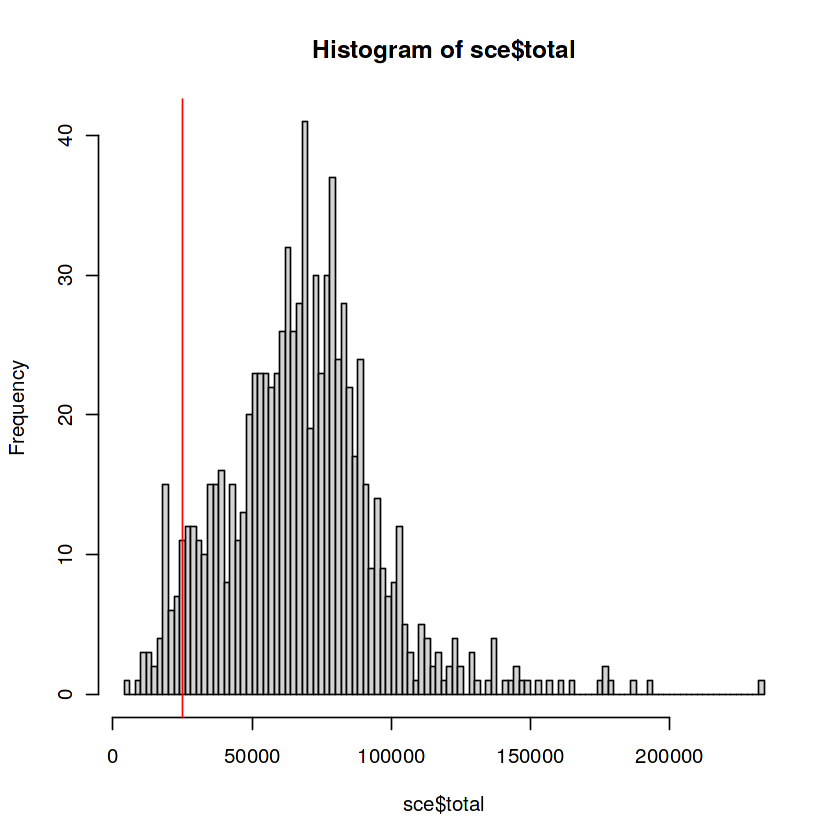

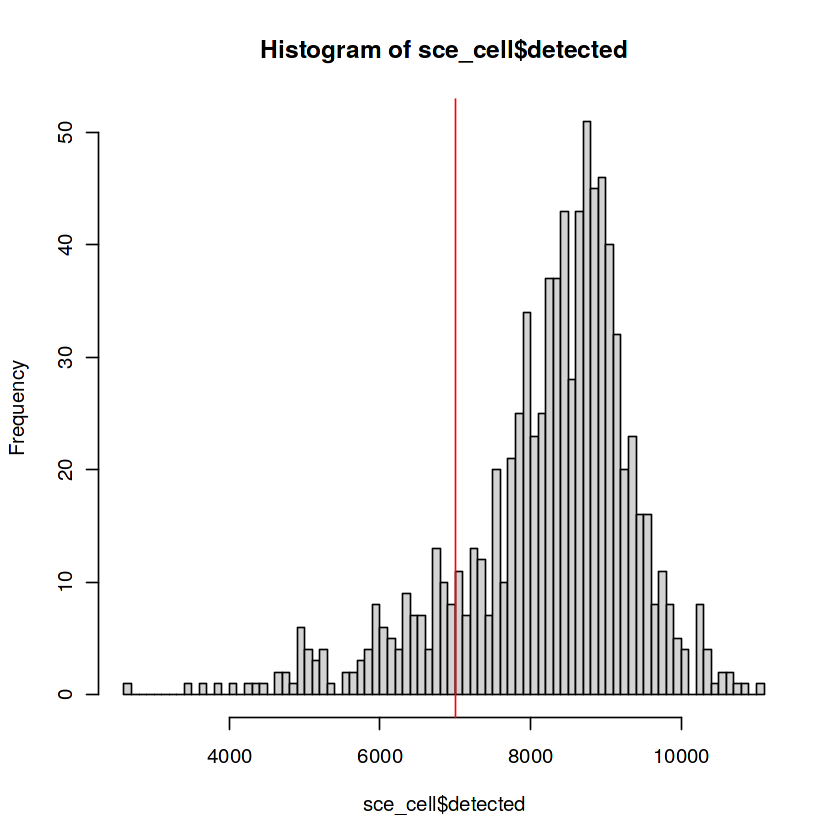

In [11]:
sce <- addPerCellQC(sce, subsets=list(Mito=is_mito))
sce <- addPerFeatureQC(sce)

hist(
    sce$total,
    breaks = 100
)
abline(v = 25000, col = "red")

hist(
  sce_cell$detected,
  breaks = 100
)
abline(v = 7000, col = "red")

low_lib_size            low_n_features high_subsets_Mito_percent 
                       47                        65                        75 
high_altexps_ERCC_percent                   discard 
                      137                       194

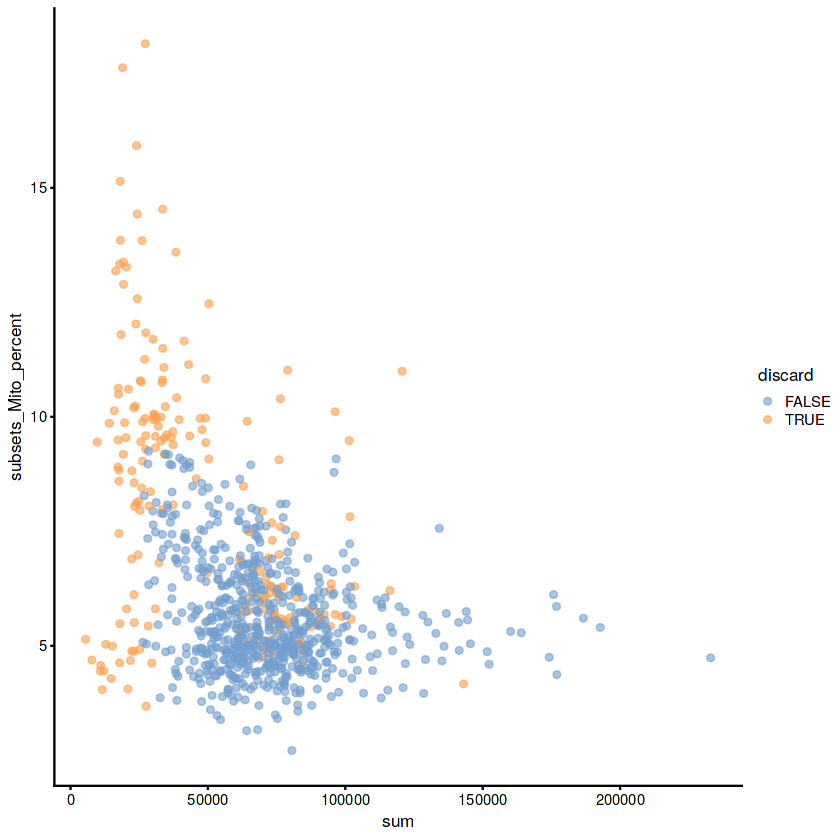

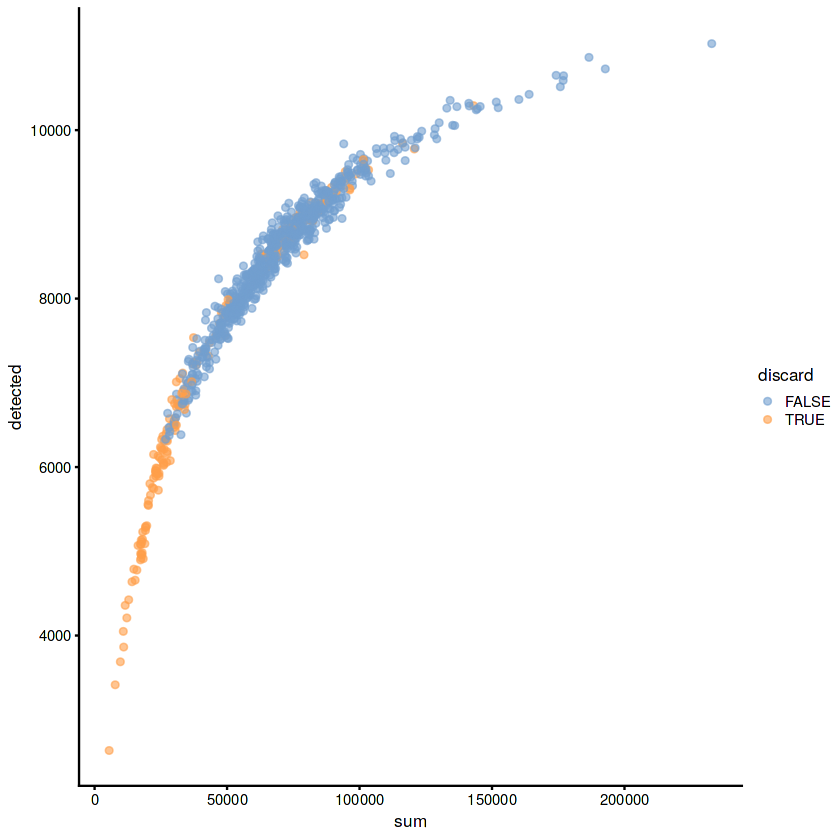

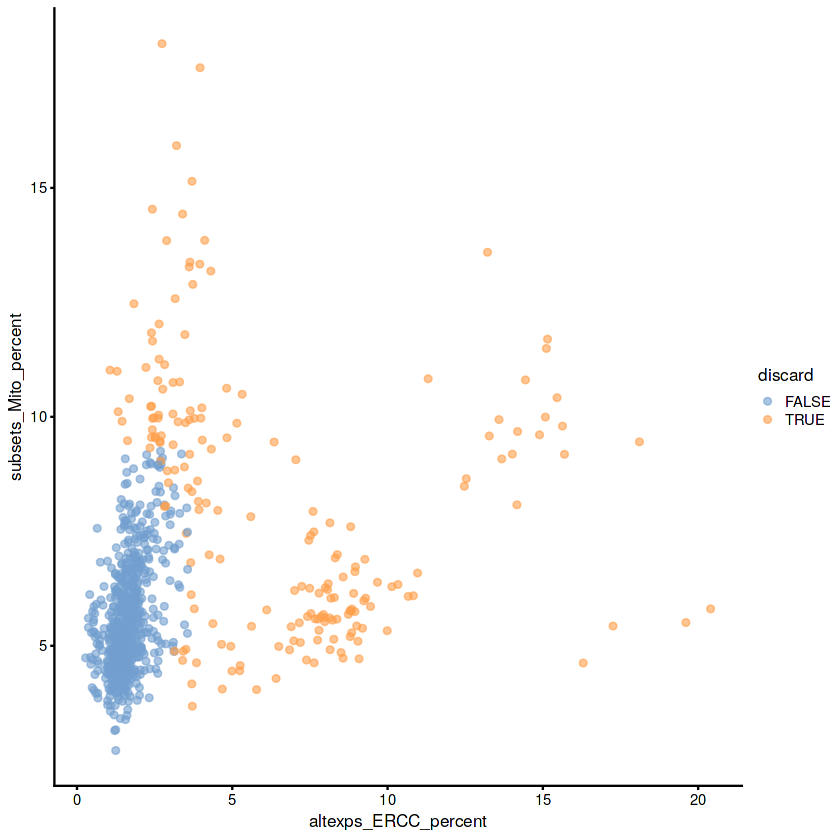

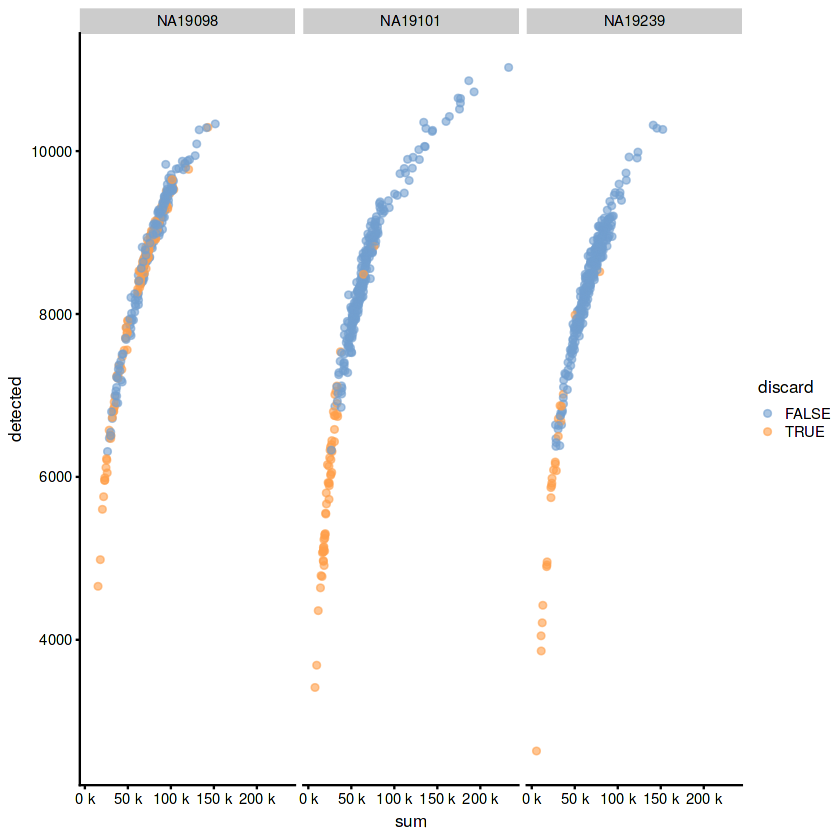

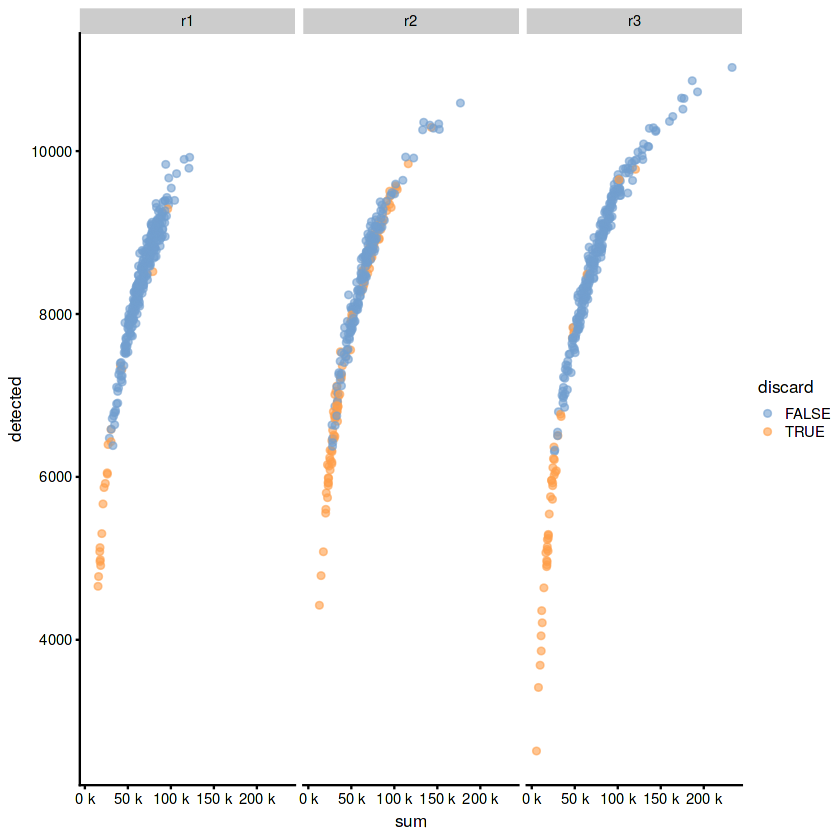

In [12]:
reasons <- quickPerCellQC(sce_cell, sub.fields=c("subsets_Mito_percent", "altexps_ERCC_percent"))
colSums(as.matrix(reasons))
sce$discard <- reasons$discard

plotColData(sce, x="sum", y="subsets_Mito_percent", colour_by="discard")

plotColData(sce, x="sum", y="detected", colour_by="discard")

plotColData(sce, x="altexps_ERCC_percent", y="subsets_Mito_percent",colour_by="discard")


library(scales)
plotColData(sce, x="sum", y="detected", colour_by="discard", other_fields = "individual") + 
  facet_wrap(~individual) + scale_x_continuous(labels = unit_format(unit = "k", scale = 1e-3))

plotColData(sce, x="sum", y="detected", colour_by="discard", other_fields = "replicate") + 
  facet_wrap(~replicate)  + scale_x_continuous(labels = unit_format(unit = "k", scale = 1e-3))


FALSE  TRUE 
13873  4205 

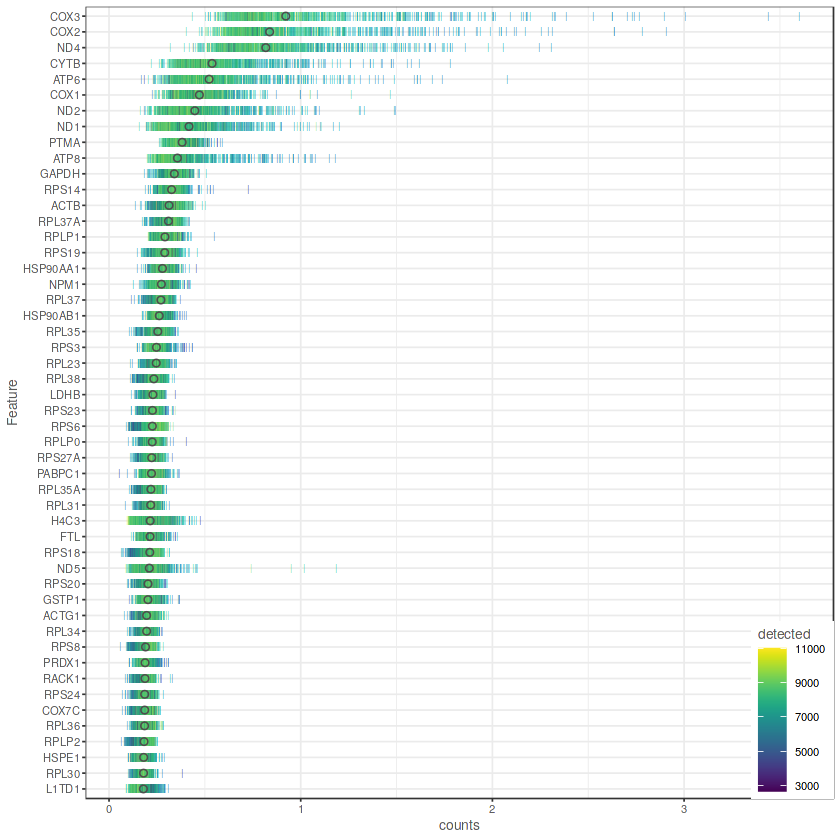

In [13]:
plotHighestExprs(sce, exprs_values = "counts", 
                 feature_names_to_plot = "SYMBOL", colour_cells_by="detected")

keep_feature <- nexprs(sce, byrow=TRUE, detection_limit = 1) >= 2
rowData(sce)$discard <- ! keep_feature
table(rowData(sce)$discard)
# assay(sce, "logcounts") <- log2(counts(sce) + 1)


In [4]:
logcounts(sce) <- log2(counts(sce) + 1)

In [11]:
floor(nrow(logcounts(sce)))

[1] 18938

In [5]:
sce

class: SingleCellExperiment 
dim: 18938 864 
metadata(0):
assays(2): counts logcounts
rownames(18938): ENSG00000237683 ENSG00000187634 ... ENSG00000183753
  ENSG00000172352
rowData names(0):
colnames(864): NA19098.r1.A01 NA19098.r1.A02 ... NA19239.r3.H11
  NA19239.r3.H12
colData names(5): individual replicate well batch sample_id
reducedDimNames(0):
mainExpName: NULL
altExpNames(1): ERCC

In [6]:
sce <- removeAltExps(sce)
sce

class: SingleCellExperiment 
dim: 18938 864 
metadata(0):
assays(2): counts logcounts
rownames(18938): ENSG00000237683 ENSG00000187634 ... ENSG00000183753
  ENSG00000172352
rowData names(0):
colnames(864): NA19098.r1.A01 NA19098.r1.A02 ... NA19239.r3.H11
  NA19239.r3.H12
colData names(5): individual replicate well batch sample_id
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [7]:
mainExpName(sce) <- "RNA"
sce

class: SingleCellExperiment 
dim: 18938 864 
metadata(0):
assays(2): counts logcounts
rownames(18938): ENSG00000237683 ENSG00000187634 ... ENSG00000183753
  ENSG00000172352
rowData names(0):
colnames(864): NA19098.r1.A01 NA19098.r1.A02 ... NA19239.r3.H11
  NA19239.r3.H12
colData names(5): individual replicate well batch sample_id
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [8]:
assay(sce, "logcounts_raw") <- log2(counts(sce) + 1)
sce.qc <- sce[! rowData(sce)$discard,! colData(sce)$discard]

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'i' in selecting a method for function '[': invalid argument type


In [19]:
## Before QC

[1] 864  50

[1] 864  50

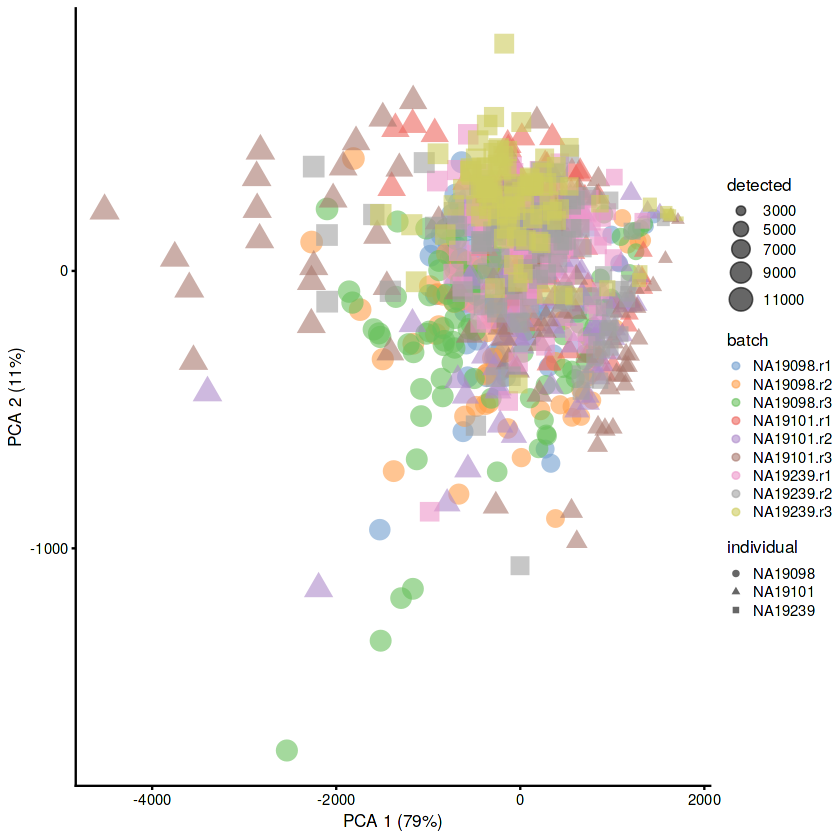

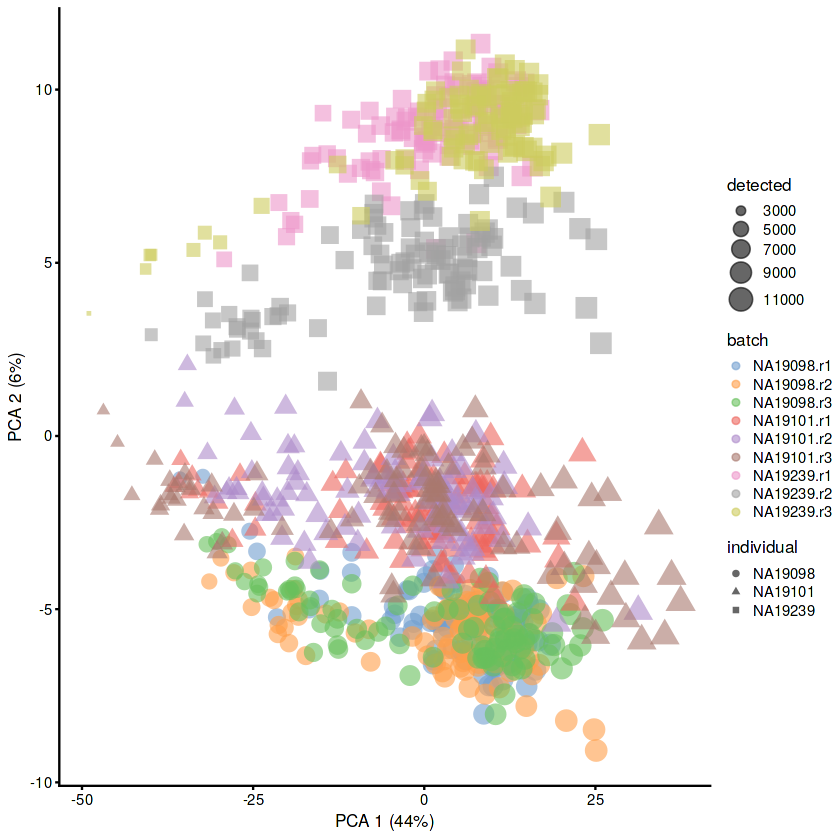

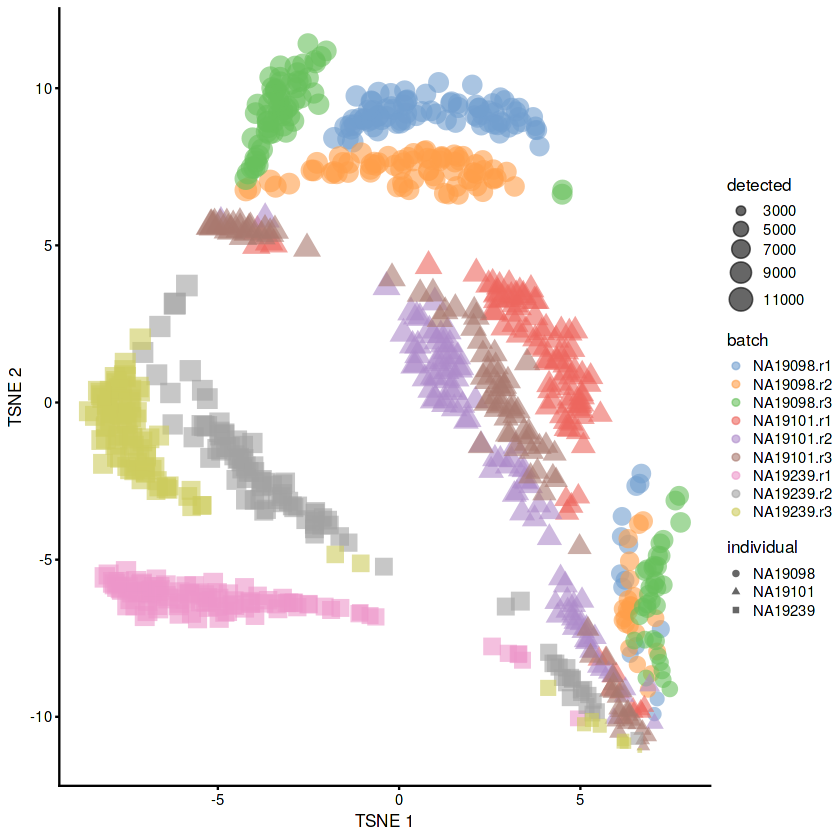

In [20]:
sce <- runPCA(sce, exprs_values = "counts")
dim(reducedDim(sce, "PCA"))
plotPCA(sce, colour_by = "batch", size_by = "detected", shape_by = "individual")

sce <- runPCA(sce, exprs_values = "logcounts_raw")
dim(reducedDim(sce, "PCA"))
plotPCA(sce, colour_by = "batch", size_by = "detected", shape_by = "individual")

set.seed(123456)
sce <- runTSNE(sce, exprs_values = "logcounts_raw", perplexity = 130)
plotTSNE(sce, colour_by = "batch", size_by = "detected", shape_by = "individual")

In [21]:
## After QC

[1] 670  50

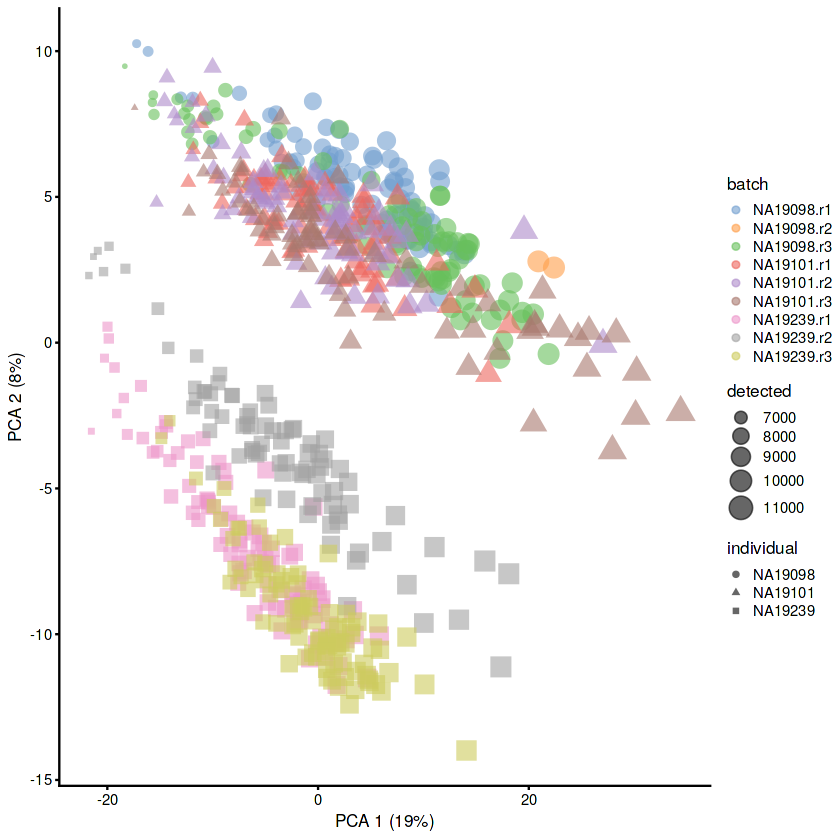

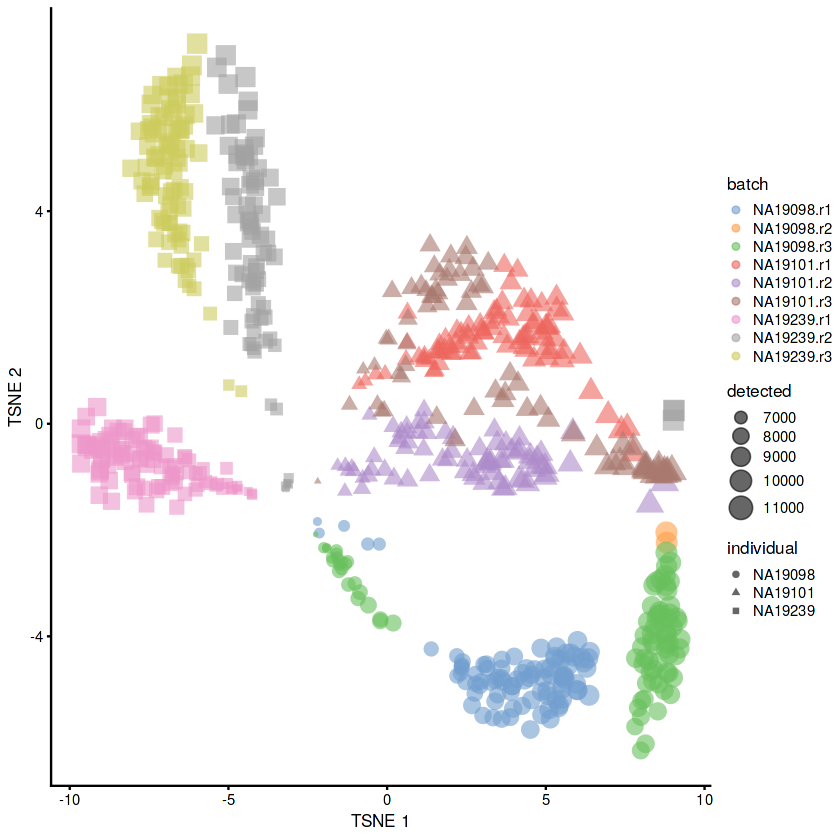

In [22]:
sce.qc <- runPCA(sce.qc, exprs_values = "logcounts_raw")
dim(reducedDim(sce.qc, "PCA"))
plotPCA(sce.qc, colour_by = "batch", size_by = "detected", shape_by = "individual")

set.seed(123456)
sce.qc <- runTSNE(sce.qc, exprs_values = "logcounts_raw", perplexity = 130)
plotTSNE(sce.qc, colour_by = "batch", size_by = "detected", shape_by = "individual")

In [23]:
##  Identifying Confounding Factors

[1] 670  50

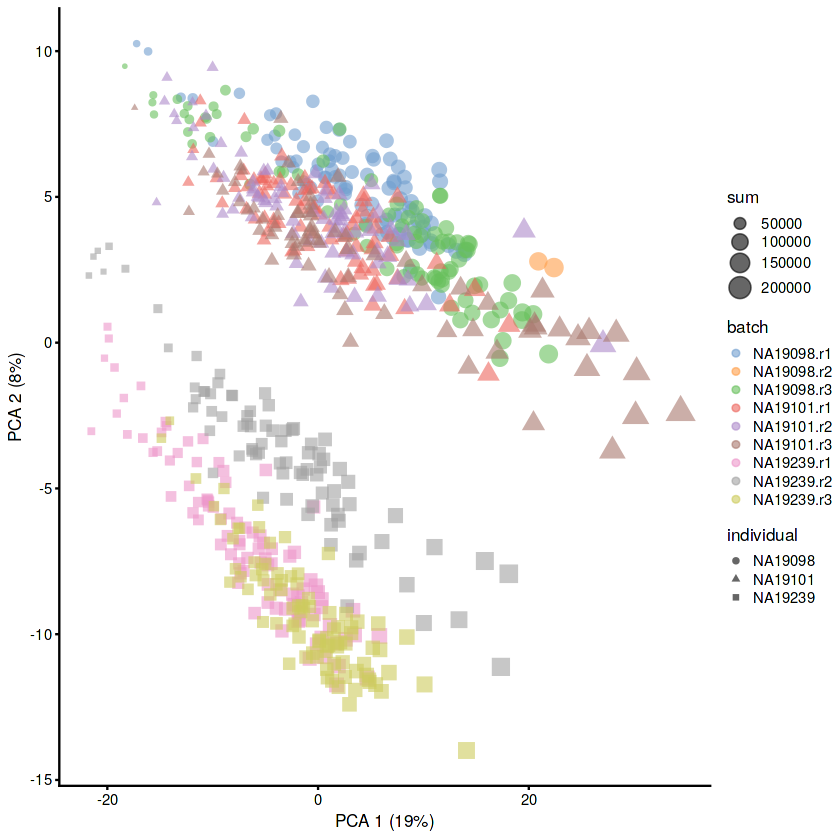

In [24]:
sce.qc <- runPCA(sce.qc, exprs_values = "logcounts_raw")
dim(reducedDim(sce.qc, "PCA"))

plotPCA(sce.qc, colour_by = "batch", size_by = "sum", shape_by = "individual")

In [25]:
### Detected genes

,sum
PC1,8.663881e+01
PC2,5.690790e+00
PC3,1.709315e-01
PC4,4.580131e-01
PC5,1.923186e-04
PC6,6.803561e-01
PC7,1.057606e-01
PC8,2.044205e-01
PC9,5.652119e-01
PC10,4.717890e-03


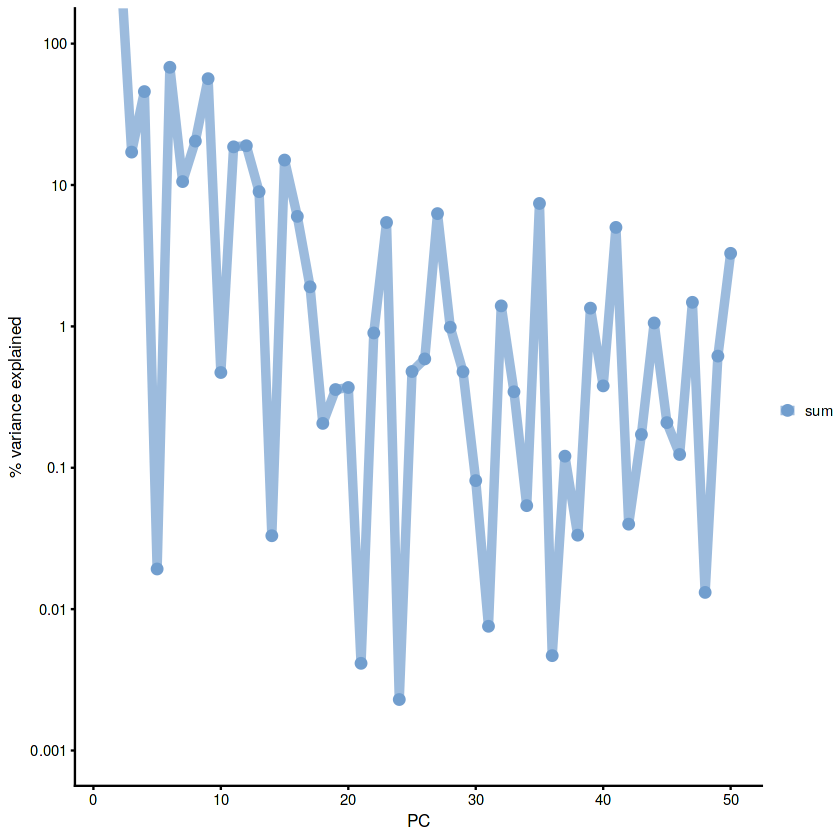

In [26]:
logcounts(sce.qc) <- assay(sce.qc, "logcounts_raw")
getExplanatoryPCs(sce.qc,variables = "sum")

plotExplanatoryPCs(sce.qc,variables = "sum") 

In [27]:
logcounts(sce.qc) <- NULL

In [28]:
### Explanatory Variables

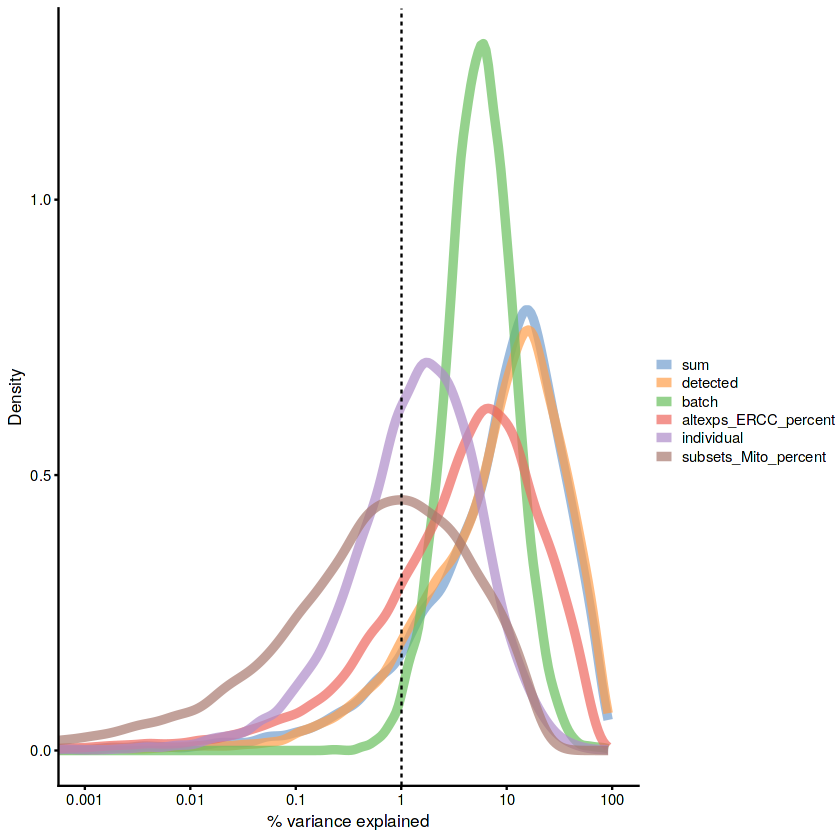

In [29]:
plotExplanatoryVariables(sce.qc,exprs_values = "logcounts_raw",
                         variables = c("detected","sum","batch",
                                       "individual","altexps_ERCC_percent","subsets_Mito_percent"))

In [30]:
# seurat_object <- as.Seurat(sce, data = NULL)
# seurat_object

In [31]:
saveRDS(sce.qc, file = '/ps/ai-ready/data/tung/tung.rds')
print("SingleCellExperiment object is saved successfully.")

[1] "SingleCellExperiment object is saved successfully."
